<a href="https://colab.research.google.com/github/jtmeawno1/BasicProg_DataViz65/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# โจทย์
ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้

1.   คะแนนประกอบด้วย 2 ส่วน

*   คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)
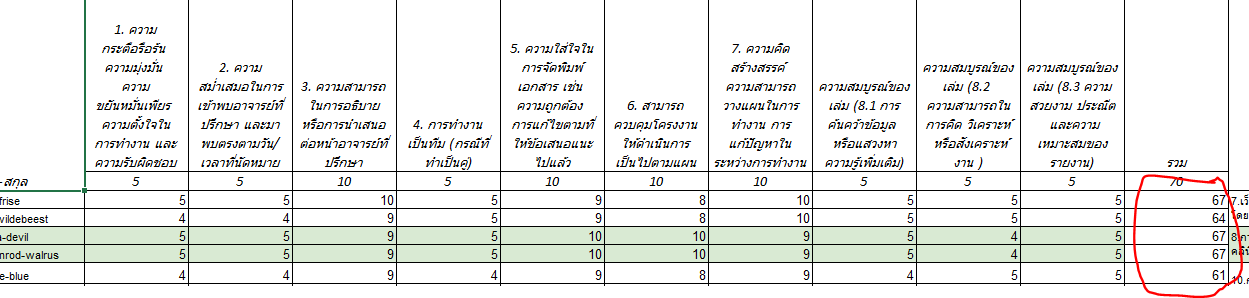

*   คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*
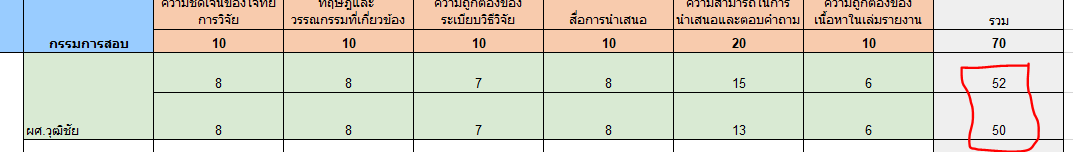
ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/1YB4qdluEN8dCE7vhDrNOW40JoUDyeEyL?usp=sharing
2.   รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
***คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)*** 3. วาดกราฟ

* Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)

* Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

* Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

***คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)***



# นำเข้าข้อมูล

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Final/')

!pwd 

/content/drive/MyDrive/Final


In [ ]:
!ls

เกรดรายวิชาProject.xlsx		คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx
คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx


#Clean ข้อมูล

## คะแนนสอบปากเปล่าของกรรมการสอบ

In [ ]:
import pandas as pd

In [ ]:
day1 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1).drop(0, axis=0)
day1.head(3)

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60


In [ ]:
day1 = day1.fillna(method='ffill')
print(day1.shape)
day1.head(3)

(54, 13)


,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60


In [ ]:
day1.isnull().sum()

ห้องสอบ                                          0
เวลา                                             0
ชื่อเรื่อง                                       0
นักศึกษา                                         0
อาจารย์                                          0
กรรมการสอบ                                       0
ความชัดเจนของโจทย์การวิจัย                       0
ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง    0
ความถูกต้องของระเบียบวิธีวิจัย                   0
สื่อการนำเสนอ                                    0
ความสามารถในการนำเสนอและตอบคำถาม                 0
ความถูกต้องของเนื้อหาในเล่มรายงาน                0
รวม                                              0
dtype: int64

In [ ]:
day2 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1).drop(0, axis=0)
day2.head(3)

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60


In [ ]:
day2 = day2.fillna(method='ffill')
print(day2.shape)
day2.head(3)

(52, 13)


,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60


In [ ]:
day2.isnull().sum()

ห้องสอบ                                          0
เวลา                                             0
ชื่อเรื่อง                                       0
นักศึกษา                                         0
อาจารย์                                          0
กรรมการสอบ                                       0
ความชัดเจนของโจทย์การวิจัย                       0
ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง    0
ความถูกต้องของระเบียบวิธีวิจัย                   0
สื่อการนำเสนอ                                    0
ความสามารถในการนำเสนอและตอบคำถาม                 0
ความถูกต้องของเนื้อหาในเล่มรายงาน                0
รวม                                              0
dtype: int64

In [ ]:
day3 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1).drop(0, axis=0)
day3.head(3)

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57


In [ ]:
day3 = day3.fillna(method='ffill')
print(day3.shape)
day3.head(3)

(54, 13)


,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57


In [ ]:
day3.isnull().sum()

ห้องสอบ                                          0
เวลา                                             0
ชื่อเรื่อง                                       0
นักศึกษา                                         0
อาจารย์                                          0
กรรมการสอบ                                       0
ความชัดเจนของโจทย์การวิจัย                       0
ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง    0
ความถูกต้องของระเบียบวิธีวิจัย                   0
สื่อการนำเสนอ                                    0
ความสามารถในการนำเสนอและตอบคำถาม                 0
ความถูกต้องของเนื้อหาในเล่มรายงาน                0
รวม                                              0
dtype: int64

In [ ]:
all_aj_list = set(list(day1['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [ ]:
all_aj_list = set(list(day2['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [ ]:
all_aj_list = set(list(day3['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

## คะแนนอาจารย์ที่ปรึกษา

In [ ]:
day1 = pd.read_excel('คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1).drop(0, axis=0)
day1.head(3)

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60


In [ ]:
# 1 ดร.ธิปไตย
tp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธิปไตย',skiprows=1).drop(0, axis=0)
tp.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
tp = tp.fillna(method='ffill')
print(tp.shape)
tp

(8, 13)


,นักศึกษา,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,ชื่อเรื่อง
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
5,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...
6,randy-rust-lionfish,4,4,7,5,8,10,9,4,5,4,60,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...
7,flaky-sepia-setter,5,5,9,5,10,10,10,5,5,5,69,32.ความเสี่ยงทางไซเบอร์ในองค์กรที่มีสาเหตุมาจา...
8,pasty-tomato-okapi,5,5,9,5,10,10,10,5,5,5,69,32.ความเสี่ยงทางไซเบอร์ในองค์กรที่มีสาเหตุมาจา...


In [ ]:
tp.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 2 รศ.ธิดาเดียว
tdd = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.ธิดาเดียว',skiprows=1).drop(0, axis=0)
tdd.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
tdd = tdd.fillna(method='ffill')
print(tdd.shape)

(6, 13)


In [ ]:
tdd.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 3 ผศ.สุกัญญา
sky = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.สุกัญญา',skiprows=1).drop(0, axis=0)
sky.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
sky = sky.fillna(method='ffill')
print(sky.shape)

(6, 13)


In [ ]:
sky.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 4 ดร.ธนพงศ์
tnp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1).drop(0, axis=0)
tnp.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
tnp = tnp.fillna(method='ffill')
print(tnp.shape)

(7, 13)


In [ ]:
tnp.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 5 ผศ.วุฒิชัย
wtc = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.วุฒิชัย',skiprows=1).drop(0, axis=0)
wtc.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
wtc = wtc.fillna(method='ffill')
print(wtc.shape)

(5, 13)


In [ ]:
wtc.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        1
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 6 รศ.สุพรรณี
spn = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.สุพรรณี',skiprows=1).drop(0, axis=0)
spn.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
spn= spn.fillna(method='ffill')
print(spn.shape)

(8, 13)


In [ ]:
spn.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    8
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   8
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 8
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        8
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           8
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               8
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 8
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         8
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     8
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 7 อ.ยุภาพร
ypp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ยุภาพร',skiprows=1).drop(0, axis=0)
ypp.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
ypp= ypp.fillna(method='ffill')
print(ypp.shape)

(6, 13)


In [ ]:
ypp.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 8 ดร.พลากร
plk = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.พลากร',skiprows=1).drop(0, axis=0)
plk.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
plk= plk.fillna(method='ffill')
print(plk.shape)

(6, 13)


In [ ]:
plk.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 9 รศ.วิชุดา
wcd = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.วิชุดา',skiprows=1).drop(0, axis=0)
wcd.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
wcd= wcd.fillna(method='ffill')
print(wcd.shape)

(9, 13)


In [ ]:
wcd.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 10 ดร.วรรณพร
wnp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.วรรณพร',skiprows=1).drop(0, axis=0)
wnp.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
wnp= wnp.fillna(method='ffill')
print(wnp.shape)

(5, 13)


In [ ]:
wnp.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 11 อ.ธรรณญพร
ayp = pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ธรรณญพร',skiprows=1).drop(0, axis=0)
ayp.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
ayp= ayp.fillna(method='ffill')
print(ayp.shape)

(8, 13)


In [ ]:
ayp.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

In [ ]:
# 12 ดร.อุทุมพร
atp= pd.read_excel('คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.อุทุมพร',skiprows=1).drop(0, axis=0)
atp.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
atp= atp.fillna(method='ffill')
print(atp.shape)

(6, 13)


In [ ]:
atp.isnull().sum()

นักศึกษา                                                                                     0
1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ    0
2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย                   0
3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา                                 0
4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)                                                        0
5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว           0
6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน                                               0
7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน                 0
ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)                         0
ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )                     0
ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเ

#1.คะแนนประกอบด้วย 2 ส่วน


## 1.1 คะแนน 40% จากอาจารย์ที่ปรึกษา 

In [ ]:
# 1 ดร.ธิปไตย
tp1= tp[['นักศึกษา','รวม']]
# แปลงเป็น 40%
tp1['รวม']=(tp1['รวม']*40/70)
tp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(8, 2)

In [ ]:
# 2 รศ.ธิดาเดียว
tdd1 = tdd[['นักศึกษา','รวม']]
# แปลงเป็น 40%
tdd1['รวม']=(tdd1['รวม']*40/70)
tdd1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(6, 2)

In [ ]:
# 3 ผศ.สุกัญญา
sky1 = sky[['นักศึกษา','รวม']]
# แปลงเป็น 40%
sky1['รวม']=(sky1['รวม']*40/70)
sky1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(6, 2)

In [ ]:
# 4 ดร.ธนพงศ์
tnp1 = tnp[['นักศึกษา','รวม']]
# แปลงเป็น 40%
tnp1['รวม']=(tnp1['รวม']*40/70)
tnp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(7, 2)

In [ ]:
# 5 ผศ.วุฒิชัย
wtc1 = wtc[['นักศึกษา','รวม']]
# แปลงเป็น 40%
wtc1['รวม']=(wtc1['รวม']*40/70)
wtc1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(5, 2)

In [ ]:
# 6 รศ.สุพรรณี
spn1 = spn[['นักศึกษา','รวม']]
# แปลงเป็น 40%
spn1['รวม']=(spn1['รวม']*40/70)
spn1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(8, 2)

In [ ]:
# 7 อ.ยุภาพร
ypp1 = ypp[['นักศึกษา','รวม']]
# แปลงเป็น 40%
ypp1['รวม']=(ypp1['รวม']*40/70)
ypp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(6, 2)

In [ ]:
# 8 ดร.พลากร
plk1 = plk[['นักศึกษา','รวม']]
# แปลงเป็น 40%
plk1['รวม']=(plk1['รวม']*40/70)
plk1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(6, 2)

In [ ]:
# 9 รศ.วิชุดา
wcd1 = wcd[['นักศึกษา','รวม']]
# แปลงเป็น 40%
wcd1['รวม']=(wcd1['รวม']*40/70)
wcd1.shape
wcd1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,นักศึกษา,รวม
1,tasty-myrtle-ant,34.857143
2,skanky-burgundy-kingfisher,34.857143
3,sleazy-mauve-akita,34.857143
4,crappy-burgundy-quoll,35.428571
5,geeky-harlequin-duck,35.428571
6,gummy-olivine-ibis,34.857143
7,frumpy-gamboge-emu,25.846154
8,ugly-harlequin-octopus,32.857143
9,craggy-cream-paradise,32.571429


In [ ]:
# 10 ดร.วรรณพร
wnp1 = wnp[['นักศึกษา','รวม']]
# แปลงเป็น 40%
wnp1['รวม']=(wnp1['รวม']*40/70)
wnp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(5, 2)

In [ ]:
# 11 อ.ธรรณญพร
ayp1 = ayp[['นักศึกษา','รวม']]
# แปลงเป็น 40%
ayp1['รวม']=(ayp1['รวม']*40/70)
ayp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(8, 2)

In [ ]:
# 12 ดร.อุทุมพร
atp1 = atp[['นักศึกษา','รวม']]
# แปลงเป็น 40%
atp1['รวม']=(atp1['รวม']*40/70)
atp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(6, 2)

In [ ]:
total_advisor = pd.concat([tp1,tdd1,sky1,tnp1,wtc1,spn1,ypp1,plk1,wcd1,wnp1,ayp1,atp1])
total_advisor 

,นักศึกษา,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
...,...,...
2,breezy-pear-macaw,39.428571
3,cozy-tangerine-ladybird,35.428571
4,scaly-pumpkin-monkey,35.428571
5,scanty-razzmatazz-rabbit,37.142857


## 1.2 คะแนน 60% จากกรรมการ

In [ ]:
Day1_1 = day1.groupby('นักศึกษา')[['รวม']].mean().reset_index()
Day1_1['รวม']=(Day1_1['รวม']*60/70)
Day1_1.head(3)

,นักศึกษา,รวม
0,boozy-thistle-wildebeest,49.285714
1,chewy-persimmon-catfish,40.714286
2,chummy-goldenrod-walrus,45.000000


In [ ]:
Day2_1 = day2.groupby('นักศึกษา')[['รวม']].mean().reset_index()
Day2_1['รวม']=(Day2_1['รวม']*60/70)
Day2_1.head(3)

,นักศึกษา,รวม
0,bumpy-indigo-dolphin,45.857143
1,chewy-lilac-shark,47.571429
2,cozy-teal-whale,51.857143


In [ ]:
Day3_1 = day3.groupby('นักศึกษา')[['รวม']].mean().reset_index()
Day3_1['รวม']=(Day3_1['รวม']*60/70)
Day3_1.head(3)

,นักศึกษา,รวม
0,breezy-pear-macaw,48.000000
1,chummy-azure-walrus,47.571429
2,clammy-zucchini-chicken,51.857143


In [ ]:
total_directors = pd.concat([Day1_1,Day2_1,Day3_1])
total_directors

,นักศึกษา,รวม
0,boozy-thistle-wildebeest,49.285714
1,chewy-persimmon-catfish,40.714286
2,chummy-goldenrod-walrus,45.000000
3,cloudy-wheat-bobcat,47.142857
4,craggy-cream-reindeer,50.142857
...,...,...
22,skanky-copper-affenpinscher,18.000000
23,snazzy-auburn-lionfish,41.571429
24,stinky-wisteria-nightingale,49.714286
25,ugly-harlequin-octopus,49.714286


# 2.รวมคะแนนและตัดเกรดแบบอิงเกณฑ์ 
<50 ได้ F ... >= 80 ได้ A 
และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน

In [ ]:
total = total_advisor.merge(total_directors,how ='left', left_on='นักศึกษา',right_on='นักศึกษา')
total

,นักศึกษา,รวม_x,รวม_y
0,leaky-rust-chameleon,38.857143,48.000000
1,greasy-ruby-bombay,34.857143,46.285714
2,wiggy-silver-drever,38.285714,42.857143
3,stinky-red-chow,38.285714,42.857143
4,bumpy-indigo-dolphin,38.285714,45.857143
...,...,...,...
75,breezy-pear-macaw,39.428571,48.000000
76,cozy-tangerine-ladybird,35.428571,44.571429
77,scaly-pumpkin-monkey,35.428571,44.571429
78,scanty-razzmatazz-rabbit,37.142857,43.285714


In [ ]:
# เปลี่ยนชื่อ columns 
total.rename(columns={'รวม_x': 'รวม 40%','รวม_y':'รวม 60%'}, inplace=True)

In [ ]:
# เพิ่ม columns คะแนนทั้งหมด
totalall = total['รวม 40%'] +  total['รวม 60%']  
total['คะแนนรวม']  = totalall 

In [ ]:
total

,นักศึกษา,รวม 40%,รวม 60%,คะแนนรวม
0,leaky-rust-chameleon,38.857143,48.000000,86.857143
1,greasy-ruby-bombay,34.857143,46.285714,81.142857
2,wiggy-silver-drever,38.285714,42.857143,81.142857
3,stinky-red-chow,38.285714,42.857143,81.142857
4,bumpy-indigo-dolphin,38.285714,45.857143,84.142857
...,...,...,...,...
75,breezy-pear-macaw,39.428571,48.000000,87.428571
76,cozy-tangerine-ladybird,35.428571,44.571429,80.000000
77,scaly-pumpkin-monkey,35.428571,44.571429,80.000000
78,scanty-razzmatazz-rabbit,37.142857,43.285714,80.428571


In [ ]:
import numpy as np

In [ ]:
total['Grade'] = np.where((total.คะแนนรวม < 50 ), 
                  'F', np.where((total.คะแนนรวม >= 50) & (total.คะแนนรวม < 55), 
                  'D', np.where((total.คะแนนรวม >= 55) & (total.คะแนนรวม < 60), 
                  'D+', np.where((total.คะแนนรวม >= 60) & (total.คะแนนรวม < 65), 
                  'C', np.where((total.คะแนนรวม >= 65) & (total.คะแนนรวม < 70), 
                  'C+', np.where((total.คะแนนรวม >= 70) & (total.คะแนนรวม < 75), 
                  'B', np.where((total.คะแนนรวม >= 75) & (total.คะแนนรวม < 80), 
                  'B+', np.where((total.คะแนนรวม >= 80) & (total.คะแนนรวม <= 100), 
                  'A', 'No Marks'))))))))
total

,นักศึกษา,รวม 40%,รวม 60%,คะแนนรวม,Grade
0,leaky-rust-chameleon,38.857143,48.000000,86.857143,A
1,greasy-ruby-bombay,34.857143,46.285714,81.142857,A
2,wiggy-silver-drever,38.285714,42.857143,81.142857,A
3,stinky-red-chow,38.285714,42.857143,81.142857,A
4,bumpy-indigo-dolphin,38.285714,45.857143,84.142857,A
...,...,...,...,...,...
75,breezy-pear-macaw,39.428571,48.000000,87.428571,A
76,cozy-tangerine-ladybird,35.428571,44.571429,80.000000,A
77,scaly-pumpkin-monkey,35.428571,44.571429,80.000000,A
78,scanty-razzmatazz-rabbit,37.142857,43.285714,80.428571,A


In [ ]:
# save table
with pd.ExcelWriter('เกรดรายวิชาProject.xlsx') as ew:
    total.to_excel(ew)

## File เกรดรายวิชาProject
https://docs.google.com/spreadsheets/d/1AzXUj7KNgYE372QlY2tOrPTioSmHUTl2/edit?usp=share_link&ouid=116674658949339551223&rtpof=true&sd=true

## 2.1 Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)


In [ ]:
total

,นักศึกษา,รวม 40%,รวม 60%,คะแนนรวม,Grade
0,leaky-rust-chameleon,38.857143,48.000000,86.857143,A
1,greasy-ruby-bombay,34.857143,46.285714,81.142857,A
2,wiggy-silver-drever,38.285714,42.857143,81.142857,A
3,stinky-red-chow,38.285714,42.857143,81.142857,A
4,bumpy-indigo-dolphin,38.285714,45.857143,84.142857,A
...,...,...,...,...,...
75,breezy-pear-macaw,39.428571,48.000000,87.428571,A
76,cozy-tangerine-ladybird,35.428571,44.571429,80.000000,A
77,scaly-pumpkin-monkey,35.428571,44.571429,80.000000,A
78,scanty-razzmatazz-rabbit,37.142857,43.285714,80.428571,A


In [ ]:
# เปลี่ยนชื่อ columns 
total.rename(columns={'นักศึกษา': 'student','รวม 40%':'total score 40%','รวม 60%':'total score 60%','คะแนนรวม':'total score'}, inplace=True)

In [ ]:
total_score = total.sort_values('total score',ascending=False).reset_index()
total_score

,index,student,total score 40%,total score 60%,total score,Grade
0,64,skinny-heliotrope-kudu,38.857143,53.571429,92.428571,A
1,26,skimpy-magenta-bombay,40.000000,51.857143,91.857143,A
2,27,lumpy-carmine-slug,40.000000,51.428571,91.428571,A
3,31,randy-charcoal-flamingo,36.571429,53.571429,90.142857,A
4,63,flabby-green-fish,37.714286,52.285714,90.000000,A
...,...,...,...,...,...,...
75,34,greasy-eggplant-oyster,28.571429,37.285714,65.857143,C+
76,36,hazy-beige-stoat,28.571429,36.857143,65.428571,C+
77,37,squirrely-seashell-kingfisher,28.571429,36.428571,65.000000,C+
78,73,skanky-copper-affenpinscher,31.428571,18.000000,49.428571,F


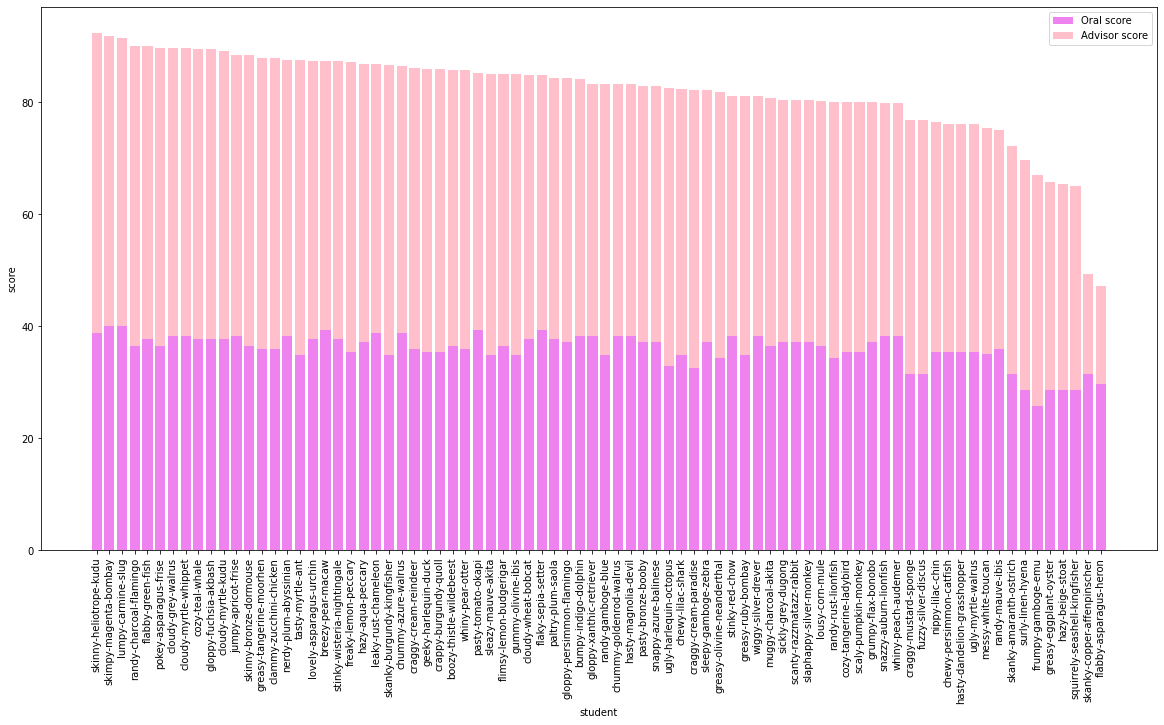

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=[20,10]

# create data
x = total_score['student']
y1 = total_score['total score 40%']
y2 = total_score['total score 60%']
plt.bar(x, y1, label ='Oral score',color='Violet')
plt.bar(x, y2, bottom=y1, label ='Advisor score',color='Pink')
plt.xticks(total_score.reset_index()['student'],rotation=90)
plt.xlabel('student')
plt.ylabel('score')
plt.legend();

## 2.2 Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

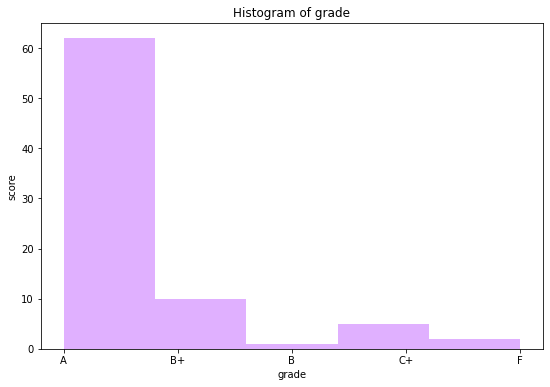

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[9,6]
plt.hist(total_score['Grade'],bins=5,color='#E0B0FF')
plt.title('Histogram of grade')
plt.xlabel('grade')
plt.ylabel('score');

## 2.3 Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

In [ ]:
matplotlib.rcParams['figure.figsize']=[25,25]

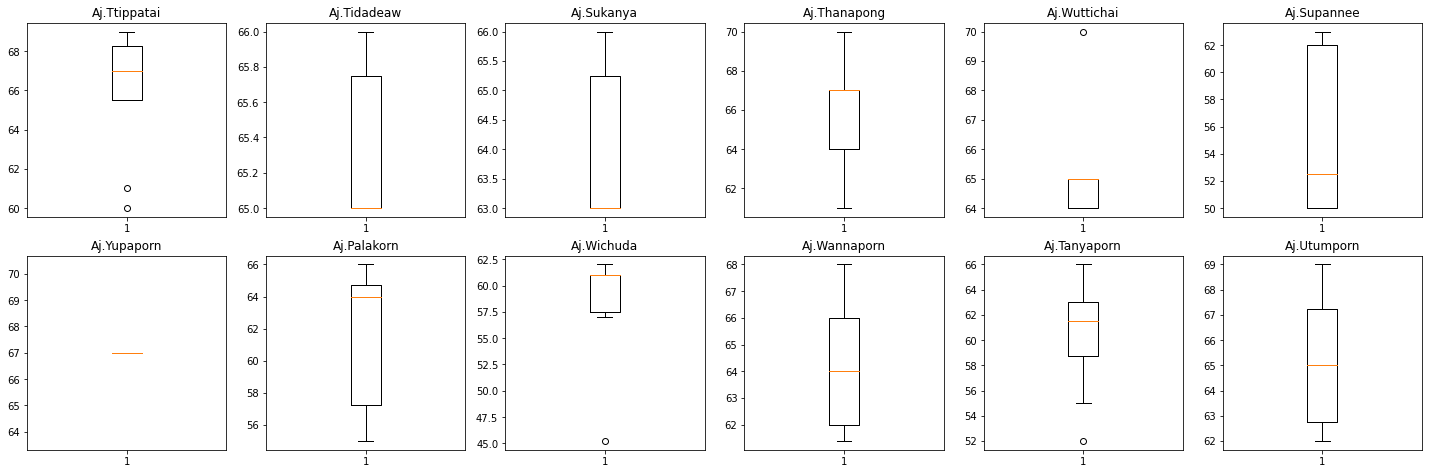

In [ ]:
plt.subplot(6,6,1)
PA01 = plt.boxplot(tp['รวม'])
plt.title('Aj.Ttippatai');
plt.subplot(6,6,2)
PA02 = plt.boxplot(tdd['รวม'])
plt.title('Aj.Tidadeaw');
plt.subplot(6,6,3)
PA03 = plt.boxplot(sky['รวม'])
plt.title('Aj.Sukanya');
plt.subplot(6,6,4)
PA04 = plt.boxplot(tnp['รวม'])
plt.title('Aj.Thanapong');
plt.subplot(6,6,5)
PA05 = plt.boxplot(wtc['รวม'])
plt.title('Aj.Wuttichai');
plt.subplot(6,6,6)
PA06 = plt.boxplot(spn['รวม'])
plt.title('Aj.Supannee');
plt.subplot(6,6,7)
PA07 = plt.boxplot(ypp['รวม'])
plt.title('Aj.Yupaporn');
plt.subplot(6,6,8)
PA08 = plt.boxplot(plk['รวม'])
plt.title('Aj.Palakorn');
plt.subplot(6,6,9)
PA09 = plt.boxplot(wcd['รวม'])
plt.title('Aj.Wichuda');
plt.subplot(6,6,10)
PA10 = plt.boxplot(wnp['รวม'])
plt.title('Aj.Wannaporn');
plt.subplot(6,6,11)
PA11 = plt.boxplot(ayp['รวม'])
plt.title('Aj.Tanyaporn');
plt.subplot(6,6,12)
PA12 = plt.boxplot(atp['รวม'])
plt.title('Aj.Utumporn');

# ชื่อสมาชิก
1. นางสาวจิราพัชร ทองประเสริฐ
2. นางสาวพัชรีภรณ์ ตากวัก